
<div style="text-align: center; font-size: 20px; line-height: 2.0;">

**University of San Carlos - Talamban Campus**  
Sitio Nasipit, Brgy, Cebu City  

**Application of Matrices in the Searching Algorithm of Search Engines**  
*A Written Report for*  
**CS 3101N Discrete Structures III**  

---

**Submitted by:**  
Roble, Myk Erolf D.  

**Submitted to:**  
Katrina B. Fuentes, Ph.D.  
*Course Instructor*  

---

**Class Schedule:**  
1 CS 3101N MW  
1:30 pm to 3:00 pm  

</div>


Adjacency matrix with numbers saved as adjacency_matrix_with_numbers.png


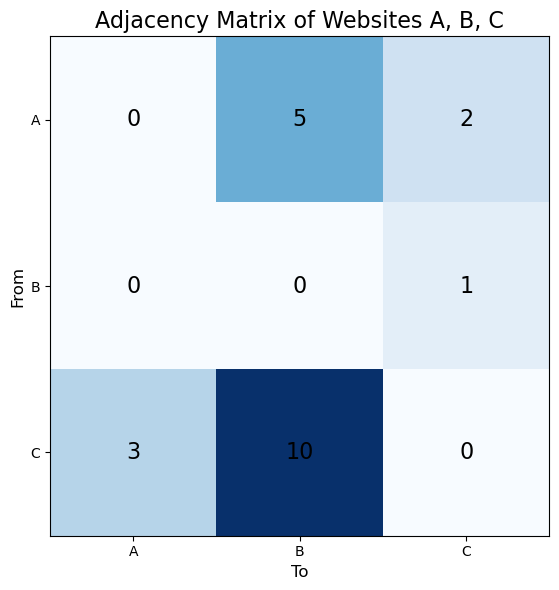

In [46]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes for websites A, B, C
G.add_nodes_from(['A', 'B', 'C'])

# Add edges based on the links between websites
# From the transcript: A -> B (5 links), A -> C (2 links), B -> C (1 link), C -> A (3 links), C -> B (10 links)
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'A'), ('C', 'B')])

# Manually set the link counts for the edges
link_counts = {
    ('A', 'B'): 5, 
    ('A', 'C'): 2,
    ('B', 'C'): 1,
    ('C', 'A'): 3,
    ('C', 'B'): 10
}

# Create adjacency matrix initialized with zeros
nodes = ['A', 'B', 'C']
adj_matrix = np.zeros((len(nodes), len(nodes)))

# Fill the adjacency matrix with link counts
for (start, end), count in link_counts.items():
    start_idx = nodes.index(start)
    end_idx = nodes.index(end)
    adj_matrix[start_idx][end_idx] = count

# Plot the adjacency matrix with numbers instead of colors
plt.figure(figsize=(6, 6))
plt.imshow(adj_matrix, cmap='Blues', interpolation='nearest')

# Add numbers on top of each cell in the matrix
for i in range(len(nodes)):
    for j in range(len(nodes)):
        plt.text(j, i, str(int(adj_matrix[i, j])), ha='center', va='center', color='black', fontsize=16)

# Set the ticks and labels
plt.xticks(np.arange(len(nodes)), nodes)
plt.yticks(np.arange(len(nodes)), nodes)

# Add labels and title
plt.title("Adjacency Matrix of Websites A, B, C", fontsize=16)
plt.xlabel("To", fontsize=12)
plt.ylabel("From", fontsize=12)

# Save the adjacency matrix as an image
plt.tight_layout()
plt.savefig("adjacency_matrix_with_numbers.png", dpi=300)

# Display the image path
print("Adjacency matrix with numbers saved as adjacency_matrix_with_numbers.png")

<div style="text-align: justified; font-size: 20px; line-height: 2.0;">
Consider the network of webpages A, B, and C. Initially, assume each webpage has an importance value of 0.25. Webpage A has a total of 8 outgoing links, so the contribution from A is evenly distributed among these links, with each link passing  $\frac{A}{8} $ of its importance to the pages it points to. For example, 5 of A’s links point to webpage B. If B has an initial importance value  Y , then its total importance is determined by the contributions it receives: 5 links from A, each contributing $ \frac{A}{8} $, and 10 links from C, each contributing  $\frac{C}{13}$ , since C has 13 outgoing links. Therefore, the final importance of B is calculated as:


$B = Y + 5 \times \frac{A}{8} + 10 \times \frac{C}{13}.$


Similarly, for webpage C, the total incoming links include 3 links from A, contributing $ \frac{A}{8} $, and 10 links from B, contributing $ \frac{B}{10} $, since B has 10 outgoing links. If C has an initial importance value  Z , its final importance is given by:


$C = Z + 3 \times \frac{A}{8} + 10 \times \frac{B}{10}.$

</div><hr style="height: 2px;">

$
T =
\begin{bmatrix}
0 & 0 & \frac{3}{13} \\
\frac{5}{8} & 0 & \frac{10}{13} \\
\frac{3}{8} & 1 & 0
\end{bmatrix}
$

$  A = X + 3 \times \frac{C}{13}$


To construct the transition matrix for the system of equations:<br>
	1.	A = X +  $3 \times \frac{C}{3} $<br>
	2.	$B = Y +  5 \times \frac{A}{8}  +  10 \times \frac{C}{13} $<br>
	3.	$C = Z +  3 \times \frac{A}{8}  +  10 \times \frac{B}{10} $
    <hr style="height: 2px;">

<div style="text-align: center; font-size: 20px; line-height: 2.0;">
R<sub>1</sub>= $
\begin{bmatrix}
\frac{1}{3} \\
\frac{1}{3} \\
\frac{1}{3}
\end{bmatrix}
$

<div style="text-align: center; font-size: 20px; line-height: 2.0;">R<sub>2</sub> = $\begin{bmatrix}
\frac{1}{13} \\
\frac{145}{312} \\
\frac{10}{21}
\end{bmatrix}
$


<div style="text-align: center; font-size: 20px; line-height: 2.0;">R<sub>3</sub> = $\begin{bmatrix}
\frac{10}{91} \\
\frac{905}{2184} \\
\frac{77}{156}
\end{bmatrix}
$


<div style="text-align: center; font-size: 20px; line-height: 2.0;">R<sub>4</sub> = $\begin{bmatrix}
\frac{77}{676} \\
\frac{6365}{14196} \\
\frac{995}{2184}
\end{bmatrix}
$
    <hr style="height: 2px;">

<div style="font-size: 20px; line-height: 2.0;">
Let  N  represent the total number of webpages. For a general webpage  i , the PageRank is given as:
<br>

$R_i = X_i + \sum_{j=1}^N T_{ij} R_j$<br>


Where:<br>
$T_{ij}$  represents the fraction of importance that webpage  j  contributes to webpage  i  through its outgoing links.<br>
$R_j$  is the rank (importance) of webpage  j .<br>
$X_i$  is the base value (if applicable).<hr style="height: 2px;">

<div style="font-size: 20px; line-height: 2.0;">To find the Rank, the equations in summation notation are:<br>

$R_i = X_i + \sum_{j \in \mathcal{I}i} T{ij} R_j$


Explanation of the Components:<br>
		 $R_i $: PageRank of webpage  i .<br>
		 $X_i $: Base value (if applicable) for webpage  i .<br>
		 $T_{ij}$ : The element in the transition matrix  T  indicating the contribution from webpage  j  to  i .<br>
		 $\mathcal{I}_i$ : The set of webpages  j  that have outgoing links to webpage  i  (incoming links for  i ).<br>

Substitute the values from the transition matrix  T :

$$
T =
\begin{bmatrix}
0 & 0 & \frac{3}{13} \\
\frac{5}{8} & 0 & \frac{10}{13} \\
\frac{3}{8} & 1 & 0
\end{bmatrix}$$
<hr style="height: 2px;">

<div style="font-size: 20px; line-height: 2.0;">Iterative Solving:

To find the vector  $\mathbf{R} $, solve the following equation iteratively:


$\mathbf{R} = T \mathbf{R}$
<hr style="height: 2px;">